### Plot events in Theia over time

In [14]:
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np

from snewpy import snowglobes

SNOwGLoBES_path = '/Users/peterasljung/Desktop/snowglobes/' # to use custom SNOwGLoBES detector/channel/smearing files, set SNOwGLoBES directory
SNEWPY_models_base = "models/"   # directory containing SNEWPY models

In [15]:
# set distance in kpc
distance = 0.15

# set SNOwGLoBES detector to use
detector = "theia"

# set SNEWPY model type and filename
modeltype = 'Odrzywolek_2010'
model = 's15_nuebar_data'

# set desired flavor transformation
transformation = 'AdiabaticMSW_NMO'

# Construct file system path of model file and name of output file
# The output file will be stored in the same directory as the model file.
modelfile = SNEWPY_models_base + "presn-models/" + modeltype + "/" + model + '.txt'
outfile = modeltype+"_"+model+"_"+transformation

In [16]:
window_tstart = - 36000
window_tend = 0
window_bins = 100
tstart = np.linspace(window_tstart, window_tend, window_bins, endpoint=False) * u.s
tend = tstart + (window_tend - window_tstart) / window_bins * u.s
tmid = (tstart + tend) * 0.5

In [17]:
print("Preparing fluences ...")
tarredfile = snowglobes.generate_fluence(modelfile, modeltype, transformation, distance, outfile, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables = snowglobes.collate(SNOwGLoBES_path, tarredfile, skip_plots=True)

Preparing fluences ...


Running SNOwGLoBES ...


/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:155: UserWarning: Smearing not found for detector=theia, channel=ibd. Using unsmeared spectrum
  warn(f'Smearing not found for detector={detector}, channel={channel.name}. Using unsmeared spectrum')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=theia, channel=ibd. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')


Collating results ...


100


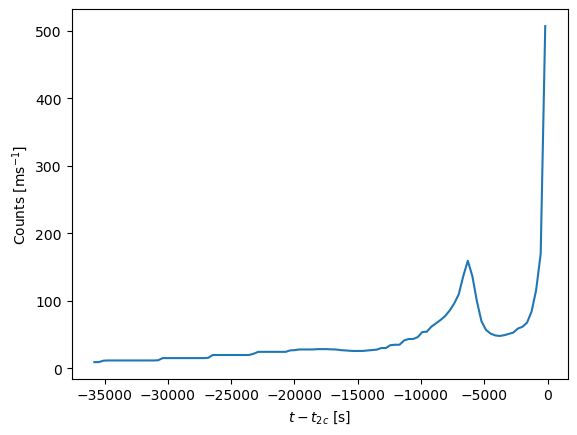

Total Events: 4310.881111317869


In [19]:
%matplotlib inline
nevents = np.zeros(len(tmid))
for i in range(len(tmid)):
    key = f"Collated_{outfile}_{i}_{detector}_events_unsmeared_weighted.dat"
    for j in range(1,len(tables[key]['header'].split())):
        nevents[i] += sum(tables[key]['data'][j])

# nevents is per bin, convert to per ms
factor = window_bins / (window_tend - window_tstart) / 1000
print(len(tmid))

plt.plot(tmid, nevents)
plt.xlabel("$t-t_{2c}$ [s]")
plt.ylabel("Counts [ms$^{-1}$]")
plt.show()

print("Total Events:", sum(nevents))